# calibration analysis

Ana the calibration parameters from different calibration runs

In [19]:
# general imports
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import tables
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
idate, ihour = time.strftime("%d/%m/%Y"), time.strftime("%H:%M:%S")
print('last visit {} at {}'.format(idate, ihour))

last visit 21/11/2016 at 17:19:09


In [21]:
idir = '/Users/hernando/Investigacion/NEXT/Data/NEWStar/pmtcalib/161117/'
#runs = [1994, 2012, 2014, 2063, 2064, 2065, 2066, 2068, 2069, 2070]
runs = [2843, 2844, 2845]

In [22]:
def getpan(irun):
    ifile = 'calf_R'+str(irun)+'_pg_panda.h5'
    store = pd.HDFStore(idir+ifile)
    pan = store.df
    return pan

pans = map(getpan, runs)

In [23]:
nruns = len(runs)
def var(label,k):
    return np.array(map(lambda i: pans[i][label][k], range(nruns)))

nsens = 12
sens = range(nsens)

In [24]:
labels = map(str, pans[0].columns)
print(labels)
dopan = {}
for label in labels:
    vmean, vstd = [], []
    for i in range(nsens):
        xvar = var(label,i)
        vmean.append(np.mean(xvar))
        vstd.append(np.std(xvar))
    dopan[label] = np.array(vmean)
    dopan['e'+label] =np.array(vstd)
opan = pd.DataFrame(dopan)

['chi2', 'gain', 'indexes', 'noise', 'noise-pe', 'ntot', 'pedestal', 'pes']


In [25]:
opan

,chi2,echi2,egain,eindexes,enoise,enoise-pe,entot,epedestal,epes,gain,indexes,noise,noise-pe,ntot,pedestal,pes
0,0.866682,0.067458,5.220553,0.0,0.234259,2.544122,85.896624,0.232422,0.065170,17.374153,11.0,7.733708,8.718711,74755.410295,0.026982,0.323396
1,0.791758,0.091513,0.394275,0.0,0.004956,0.407370,53.860870,0.070934,0.123801,24.199667,9.0,7.444395,9.065771,74697.416073,0.014963,0.299493
2,0.865099,0.100698,4.958878,0.0,0.287866,2.312054,173.064619,0.160210,0.085917,18.696748,0.0,7.661508,11.190349,74772.559238,0.054017,0.423005
3,0.788858,0.025551,0.399306,0.0,0.085063,0.271979,27.084305,0.106340,0.137017,21.084085,5.0,7.975960,6.881789,74695.559138,0.110717,0.323149
4,1.050877,0.079694,0.145049,0.0,0.050259,0.304333,36.271333,0.154773,0.118098,33.504469,7.0,6.641882,12.146020,74664.520914,0.188190,0.276615
5,0.914978,0.036246,0.475770,0.0,0.021971,0.361981,38.633282,0.147233,0.138073,24.907713,2.0,7.953913,9.195239,74665.497290,0.159270,0.349269
6,0.791826,0.087007,0.184429,0.0,0.012355,0.253059,37.833298,0.057707,0.144972,20.096798,8.0,7.162053,7.511830,74702.199447,0.057472,0.339627
7,0.900190,0.045131,1.012323,0.0,0.082451,0.723864,51.524886,0.198711,0.167839,22.521606,1.0,7.600892,10.631828,74676.412768,0.032616,0.443344
8,0.641372,0.028174,0.446473,0.0,0.031230,0.257461,57.149937,0.170684,0.118217,24.596747,4.0,9.290181,8.463713,74647.741185,0.051376,0.291607
9,0.855621,0.032310,0.260761,0.0,0.036059,0.200285,16.283709,0.085588,0.114947,22.373794,6.0,6.188105,8.364551,74694.284147,0.121000,0.279187


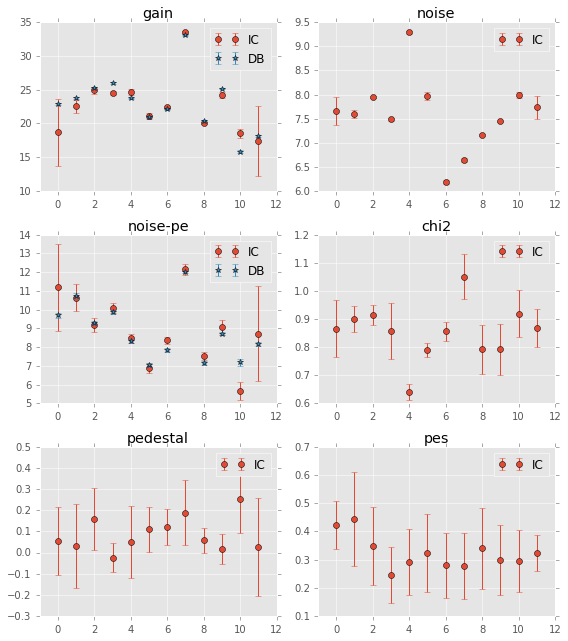

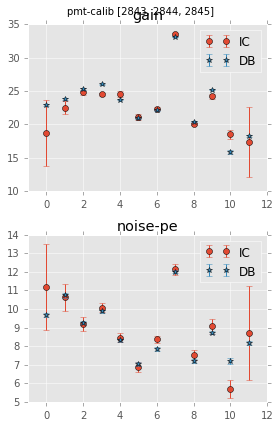

In [26]:
import calib as sc

again = [22.91, 23.75, 25.3, 25.99, 23.70, 20.89, 22.13, 33.09, 20.43, 25.16, 15.85, 18.21]
aegain = [0.14, 0.17, 0.09, 0.09, 0.08, 0.11, 0.08, 0.06, 0.11, 0.07, 0.25, 0.15]

anoise_pe = [9.69, 10.73, 9.27, 9.88, 8.32, 7.03, 7.85, 12.01, 7.18, 8.72, 7.20, 8.17] 
aenoise_pe = [0.12, 0.14, 0.10, 0.09, 0.09, 0.11, 0.09, 0.07, 0.11, 0.08, 0.18, 0.13]

def xyey_(label):
    x = opan['indexes']
    y = opan[label]
    ey = opan['e'+label]
    vals = zip(x.values,y.values,ey.values)
    vals.sort()
    x = np.array(map(lambda val: val[0], vals))
    y = np.array(map(lambda val: val[1], vals))
    ey = np.array(map(lambda val: val[2], vals))
    return x,y,ey

def polo_sens(labels, title=''):
    n = len(labels)
    nx, ny, figsize = sc.plt_subplots(n)
    fig, axes = plt.subplots(nx, ny, figsize=figsize)
    plt.suptitle(title)
    for i, label in enumerate(labels):
        ax = plt.subplot(nx, ny, i+1)
        x, y, ey = xyey_(label)
        ax.errorbar(x, y, ey, fmt='o', label='IC')
        if (label == 'gain'):
            ax.errorbar(x, again, aegain, fmt='*', label='DB')
        if (label == 'noise-pe'):
            ax.errorbar(x, anoise_pe, aenoise_pe, fmt='*', label='DB')
        ax.legend()
        plt.xlim(-1.,12.)
        ax.set_title(label)
    fig.tight_layout()
    plt.show()
    return fig


ilabels = ['gain','noise','noise-pe','chi2','pedestal','pes']
fig = polo_sens(ilabels)
fig.savefig(idir+'pmt_calib_summary.pdf')

ilabels = ['gain', 'noise-pe']
fig = polo_sens(ilabels, 'pmt-calib [2843, 2844, 2845]')
fig.savefig(idir+'pmt_calib_summary_main.pdf')



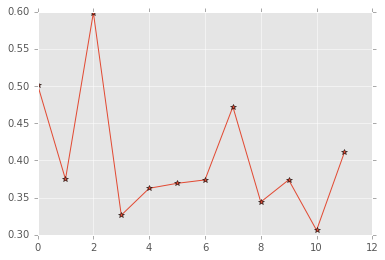

In [27]:
rat = opan['noise-pe']/opan['gain']
plt.plot(rat, marker='*')

In [29]:
opan.to_csv(idir+'pmt_calib_summary.cvs')
opan.to_hdf(idir+'pmt_calib_summary.h5','df',mode='w',format='table',data_columns=True)